In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# 1. Chargement et EDA

In [2]:
# Charger le dataset
data = pd.read_csv('dataset.csv')

In [3]:
print("Colonnes disponibles :")
print(data.columns)

Colonnes disponibles :
Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [4]:
# Affichage des premières lignes
print("Aperçu du dataset :")
display(data.head())


Aperçu du dataset :


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [5]:
# Informations sur le dataset
print("\nInformations sur le dataset :")
display(data.info())


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


None

In [6]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
display(data.describe())


Statistiques descriptives :


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000


In [7]:
# Calcul des valeurs manquantes par colonne
missing_values = data.isnull().sum()
missing_percentages = (missing_values / len(data)) * 100

print("Valeurs manquantes par colonne :")
display(pd.DataFrame({
    'Valeurs manquantes': missing_values,
    'Pourcentage': missing_percentages
}))

Valeurs manquantes par colonne :


,Valeurs manquantes,Pourcentage
Store,0,0.000000
Date,18,12.000000
Weekly_Sales,14,9.333333
Holiday_Flag,12,8.000000
Temperature,18,12.000000
Fuel_Price,14,9.333333
CPI,12,8.000000
Unemployment,15,10.000000


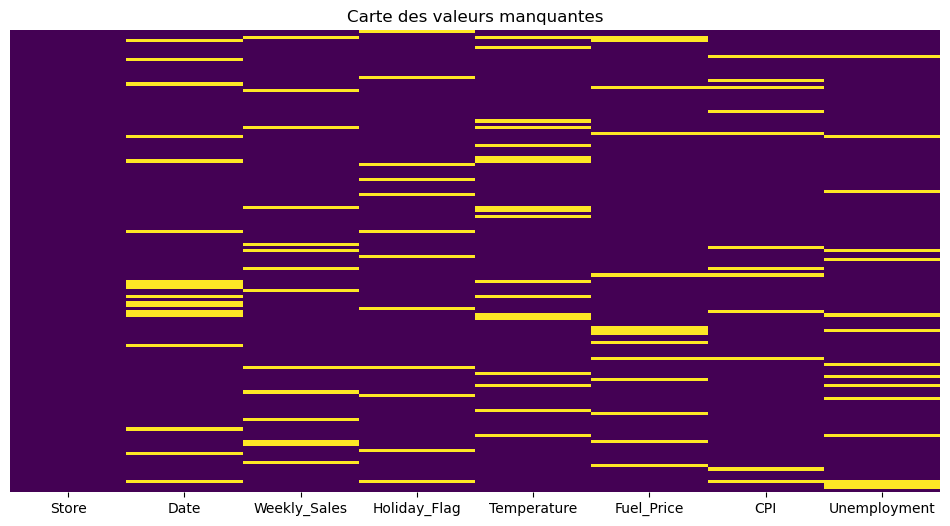

In [8]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Carte des valeurs manquantes')
plt.show()

In [9]:
# Suppression des lignes où Weekly_Sales est manquant
data = data.dropna(subset=['Weekly_Sales'])
print("Taille du dataset après suppression des Weekly_Sales manquants :", len(data))

Taille du dataset après suppression des Weekly_Sales manquants : 136


In [10]:
# Fonction pour supprimer les outliers  
def remove_outliers(df, col):
    mean = df[col].mean()
    std = df[col].std()
    return df[(df[col] >= mean - 3 * std) & (df[col] <= mean + 3 * std)]

In [11]:
# Liste des colonnes à nettoyer
columns_to_clean = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Affichage des statistiques avant nettoyage
print("Statistiques avant nettoyage des outliers :")
display(data[columns_to_clean].describe())

Statistiques avant nettoyage des outliers :


,Temperature,Fuel_Price,CPI,Unemployment
count,121.000000,124.000000,125.000000,122.000000
mean,60.853967,3.316992,178.091144,7.665582
std,18.514432,0.479540,40.243105,1.619428
min,18.790000,2.514000,126.111903,5.143000
25%,45.220000,2.838500,131.637000,6.690000
50%,62.250000,3.451000,196.919506,7.477000
75%,75.950000,3.724000,214.878556,8.150000
max,91.650000,4.193000,226.968844,14.313000


In [12]:
# Nettoyage des outliers
for col in columns_to_clean:
    data = remove_outliers(data, col)

# Affichage des statistiques après nettoyage
print("\nStatistiques après nettoyage des outliers :")
display(data[columns_to_clean].describe())


Statistiques après nettoyage des outliers :


,Temperature,Fuel_Price,CPI,Unemployment
count,90.00000,90.000000,90.000000,90.000000
mean,61.06100,3.318444,179.524905,7.389733
std,17.74604,0.484399,39.554303,0.982729
min,18.79000,2.548000,126.128355,5.143000
25%,45.34250,2.814750,132.602339,6.642250
50%,61.45000,3.468000,197.166416,7.419000
75%,75.79250,3.737750,214.855374,8.099000
max,91.65000,4.170000,226.968844,9.342000


In [13]:
# Taille du dataset après nettoyage des outliers
print("\nTaille du dataset après nettoyage des outliers :", len(data))


Taille du dataset après nettoyage des outliers : 90


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


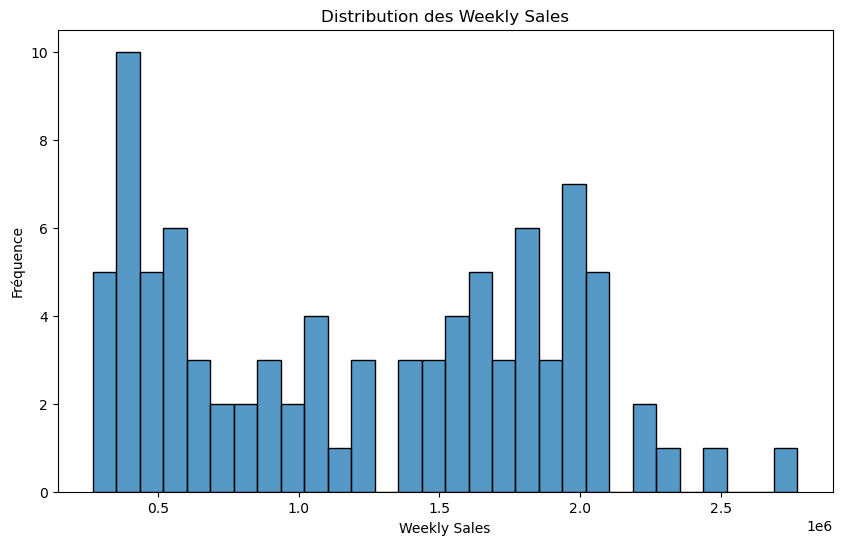

In [14]:
# Distribution des Weekly_Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], bins=30)
plt.title('Distribution des Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Fréquence')
plt.show()

In [15]:
# Affichage du dataset final
print("Aperçu du dataset final :")
display(data.head())


Aperçu du dataset final :


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961


In [16]:
print("\nInformations sur le dataset final :")
display(data.info())


Informations sur le dataset final :
<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         90 non-null     float64
 1   Date          80 non-null     object 
 2   Weekly_Sales  90 non-null     float64
 3   Holiday_Flag  80 non-null     float64
 4   Temperature   90 non-null     float64
 5   Fuel_Price    90 non-null     float64
 6   CPI           90 non-null     float64
 7   Unemployment  90 non-null     float64
dtypes: float64(7), object(1)
memory usage: 6.3+ KB


None

In [17]:
print("\nStatistiques descriptives finales :")
display(data.describe())


Statistiques descriptives finales :


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,90.000000,9.000000e+01,80.000000,90.00000,90.000000,90.000000,90.000000
mean,9.900000,1.233865e+06,0.075000,61.06100,3.318444,179.524905,7.389733
std,6.204475,6.647250e+05,0.265053,17.74604,0.484399,39.554303,0.982729
min,1.000000,2.689290e+05,0.000000,18.79000,2.548000,126.128355,5.143000
25%,4.000000,5.617240e+05,0.000000,45.34250,2.814750,132.602339,6.642250
50%,9.000000,1.260826e+06,0.000000,61.45000,3.468000,197.166416,7.419000
75%,15.750000,1.807159e+06,0.000000,75.79250,3.737750,214.855374,8.099000
max,20.000000,2.771397e+06,1.000000,91.65000,4.170000,226.968844,9.342000


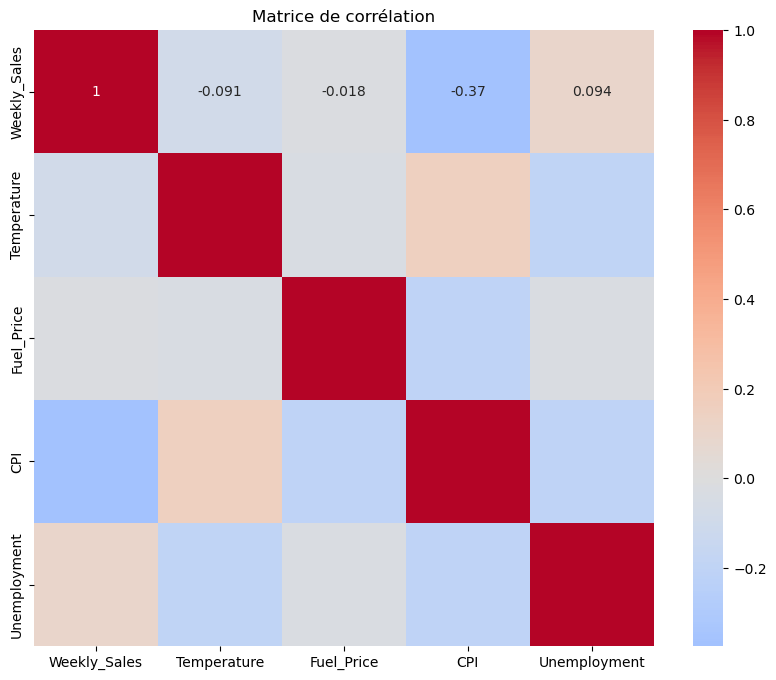

In [18]:
# Matrice de corrélation
correlation_matrix = data[['Weekly_Sales'] + columns_to_clean].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

In [19]:

# Séparation de la donnée Date en plusieurs données (année, mois, jour)
data["dt"] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

data["Year"] = data["dt"].dt.year
data["Month"] = data["dt"].dt.month
data["Day"] = data["dt"].dt.day
data["DayOfWeek"] = data["dt"].dt.dayofweek

# Convertir les colonnes en entiers, tout en laissant les valeurs nulles inchangées
col_to_transform = ["Year", "Month", "Day","DayOfWeek"]

# Suppression de la colonne date
data.drop(columns=['Date', 'dt'], inplace=True)

# Gestion des valeurs manquantes
data['Holiday_Flag'] = data['Holiday_Flag'].fillna(0)
numeric_columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Affichage des informations mises à jour
print("\nInformations sur le dataset après prétraitement :")
display(data.info())



Informations sur le dataset après prétraitement :
<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 149
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         90 non-null     float64
 1   Weekly_Sales  90 non-null     float64
 2   Holiday_Flag  90 non-null     float64
 3   Temperature   90 non-null     float64
 4   Fuel_Price    90 non-null     float64
 5   CPI           90 non-null     float64
 6   Unemployment  90 non-null     float64
 7   Year          80 non-null     float64
 8   Month         80 non-null     float64
 9   Day           80 non-null     float64
 10  DayOfWeek     80 non-null     float64
dtypes: float64(11)
memory usage: 8.4 KB


None

In [20]:

# Définir les variables explicatives et la variable cible
# Variables numériques
features_num = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek']
# Variables catégorielles
features_cat = ['Store', 'Holiday_Flag']

# Création des datasets X et y
X = data[features_num + features_cat]
y = data['Weekly_Sales']

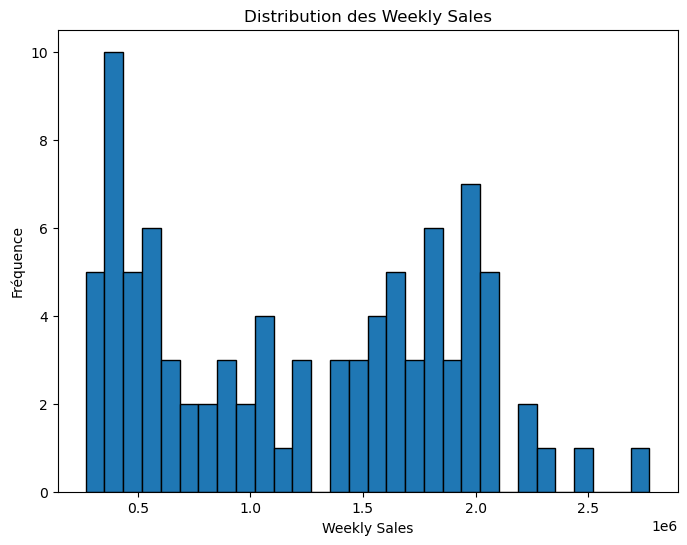

In [21]:
# Visualisation de la distribution des Weekly_Sales
plt.figure(figsize=(8, 6))
plt.hist(data['Weekly_Sales'], bins=30, edgecolor='k')
plt.title('Distribution des Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Fréquence')
plt.show()

In [22]:
# Fonction pour supprimer les outliers  
def remove_outliers(df, col):
    mean = df[col].mean()
    std = df[col].std()
    return df[(df[col] >= mean - 3 * std) & (df[col] <= mean + 3 * std)]

In [23]:
# Suppression des outliers sur les colonnes numériques indiquées
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    data = remove_outliers(data, col)

# 2. Baseline Model (Linear Regression)

In [24]:
# Gestion des valeurs manquantes
data['Holiday_Flag'] = data['Holiday_Flag'].fillna(0)
numeric_columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Suppression des lignes où Weekly_Sales est NaN
data = data.dropna(subset=['Weekly_Sales'])

In [25]:
# Définition des variables explicatives et de la variable cible
X = data[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = data['Weekly_Sales']

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des dimensions
print("Dimensions des ensembles d'entraînement :")
print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print("\nDimensions des ensembles de test :")
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")

# Vérification des valeurs manquantes
print("\nValeurs manquantes dans X_train :")
print(X_train.isnull().sum())
print("\nValeurs manquantes dans y_train :")
print(y_train.isnull().sum())

Dimensions des ensembles d'entraînement :
X_train : (72, 6)
y_train : (72,)

Dimensions des ensembles de test :
X_test : (18, 6)
y_test : (18,)

Valeurs manquantes dans X_train :
Store           0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Valeurs manquantes dans y_train :
0


In [26]:
# Création du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [27]:
# Calcul des métriques sur l'ensemble d'entraînement
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calcul des métriques sur l'ensemble de test
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nPerformances du modèle :")
print("Ensemble d'entraînement :")
print(f"RMSE : {train_rmse:.2f}")
print(f"R² : {train_r2:.4f}")
print("\nEnsemble de test :")
print(f"RMSE : {test_rmse:.2f}")
print(f"R² : {test_r2:.4f}")


Performances du modèle :
Ensemble d'entraînement :
RMSE : 595367.42
R² : 0.2140

Ensemble de test :
RMSE : 678885.52
R² : -0.3949


In [28]:
# Création d'un DataFrame avec les coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Tri des coefficients par valeur absolue
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("\nCoefficients du modèle (triés par importance) :")
display(coef_df)



Coefficients du modèle (triés par importance) :


,Feature,Coefficient,Abs_Coefficient
3,Fuel_Price,-102717.895127,102717.895127
1,Holiday_Flag,18163.267459,18163.267459
5,Unemployment,-18008.692514,18008.692514
0,Store,-9905.389194,9905.389194
4,CPI,-9065.239540,9065.239540
2,Temperature,699.650714,699.650714


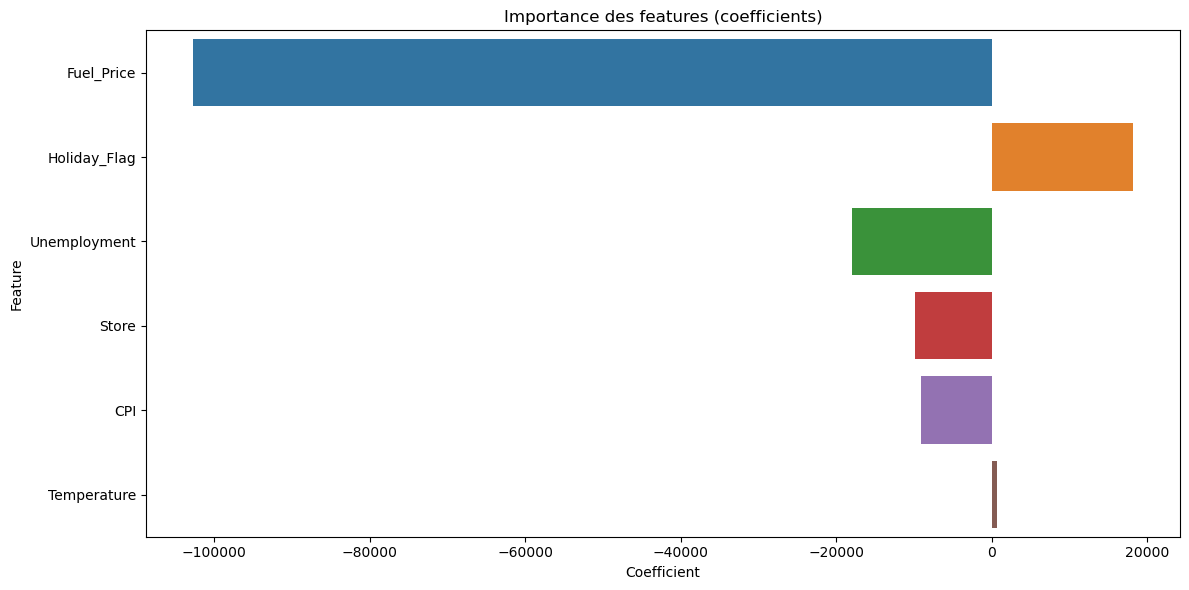

In [29]:
# Visualisation des coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Importance des features (coefficients)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

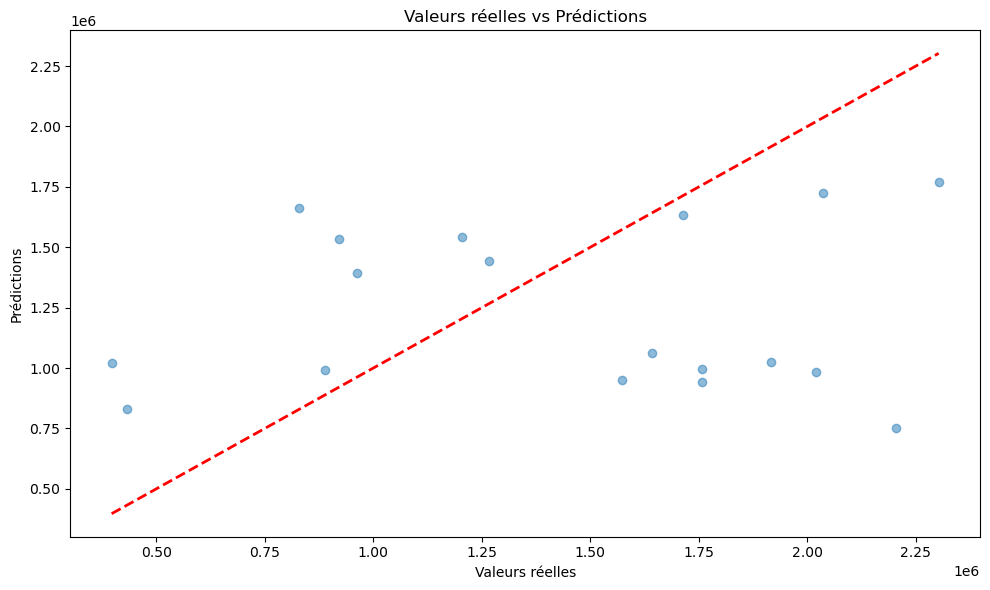

In [30]:
# Création d'un graphique de dispersion des valeurs réelles vs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Valeurs réelles vs Prédictions')
plt.tight_layout()
plt.show()

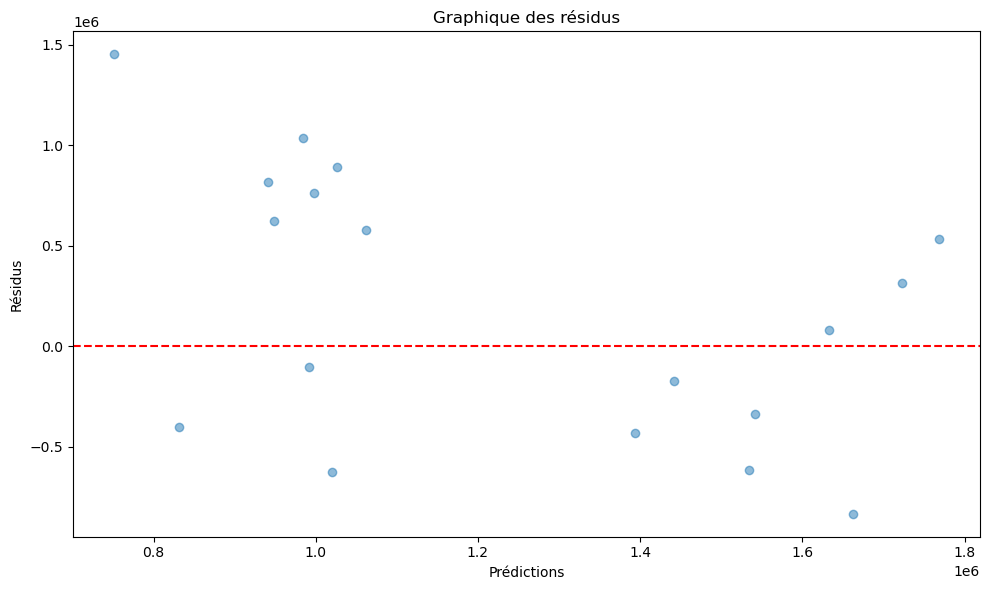

In [31]:
# Calcul des résidus
residuals = y_test - y_test_pred

# Graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Graphique des résidus')
plt.tight_layout()
plt.show()

# 3. Modèle de régression linéaire de base

In [ ]:
### 2.1 Ridge Regression

# Définition des paramètres à tester pour Ridge
ridge_params = {
    'alpha': np.logspace(-3, 3, 100)   
}

# Création du modèle Ridge avec GridSearchCV
ridge = Ridge()
ridge_cv = GridSearchCV(
    ridge,
    param_grid=ridge_params,
    cv=5,  
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Entraînement du modèle
ridge_cv.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres pour Ridge :")
print(ridge_cv.best_params_)
print(f"Meilleur score (RMSE) : {np.sqrt(-ridge_cv.best_score_):.2f}")

Meilleurs paramètres pour Ridge :
{'alpha': 1000.0}
Meilleur score (RMSE) : 615964.58


In [33]:
# Prédictions avec le meilleur modèle Ridge
y_train_ridge = ridge_cv.predict(X_train)
y_test_ridge = ridge_cv.predict(X_test)

# Évaluation des performances
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_ridge))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_ridge))
ridge_train_r2 = r2_score(y_train, y_train_ridge)
ridge_test_r2 = r2_score(y_test, y_test_ridge)

print("\nPerformances Ridge :")
print("Ensemble d'entraînement :")
print(f"RMSE : {ridge_train_rmse:.2f}")
print(f"R² : {ridge_train_r2:.4f}")
print("\nEnsemble de test :")
print(f"RMSE : {ridge_test_rmse:.2f}")
print(f"R² : {ridge_test_r2:.4f}")


Performances Ridge :
Ensemble d'entraînement :
RMSE : 597815.04
R² : 0.2076

Ensemble de test :
RMSE : 684296.37
R² : -0.4172


In [ ]:
### 2.2 Lasso Regression

# Définition des paramètres à tester pour Lasso
lasso_params = {
    'alpha': np.logspace(-3, 3, 100)  
}

# Création du modèle Lasso avec GridSearchCV
lasso = Lasso()
lasso_cv = GridSearchCV(
    lasso,
    param_grid=lasso_params,
    cv=5,   
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Entraînement du modèle
lasso_cv.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("\nMeilleurs paramètres pour Lasso :")
print(lasso_cv.best_params_)
print(f"Meilleur score (RMSE) : {np.sqrt(-lasso_cv.best_score_):.2f}")


Meilleurs paramètres pour Lasso :
{'alpha': 1000.0}
Meilleur score (RMSE) : 669545.49


In [35]:
# Prédictions avec le meilleur modèle Lasso
y_train_lasso = lasso_cv.predict(X_train)
y_test_lasso = lasso_cv.predict(X_test)

# Évaluation des performances
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_lasso))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_lasso))
lasso_train_r2 = r2_score(y_train, y_train_lasso)
lasso_test_r2 = r2_score(y_test, y_test_lasso)

print("\nPerformances Lasso :")
print("Ensemble d'entraînement :")
print(f"RMSE : {lasso_train_rmse:.2f}")
print(f"R² : {lasso_train_r2:.4f}")
print("\nEnsemble de test :")
print(f"RMSE : {lasso_test_rmse:.2f}")
print(f"R² : {lasso_test_r2:.4f}")


Performances Lasso :
Ensemble d'entraînement :
RMSE : 595383.89
R² : 0.2140

Ensemble de test :
RMSE : 679625.04
R² : -0.3979


In [36]:
## 3. Comparaison des modèles

# Création d'un DataFrame pour comparer les performances
comparison_df = pd.DataFrame({
    'Modèle': ['Régression Linéaire', 'Ridge', 'Lasso'],
    'Train RMSE': [train_rmse, ridge_train_rmse, lasso_train_rmse],
    'Test RMSE': [test_rmse, ridge_test_rmse, lasso_test_rmse],
    'Train R²': [train_r2, ridge_train_r2, lasso_train_r2],
    'Test R²': [test_r2, ridge_test_r2, lasso_test_r2]
})

print("\nComparaison des performances des modèles :")
display(comparison_df)


Comparaison des performances des modèles :


,Modèle,Train RMSE,Test RMSE,Train R²,Test R²
0,Régression Linéaire,595367.422225,678885.523528,0.214035,-0.394895
1,Ridge,597815.035081,684296.369772,0.207559,-0.417219
2,Lasso,595383.885809,679625.043070,0.213992,-0.397936


In [37]:
## 4. Analyse des coefficients

# Création des DataFrames pour les coefficients
ridge_coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_cv.best_estimator_.coef_
})

lasso_coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_cv.best_estimator_.coef_
})

# Tri des coefficients par valeur absolue
ridge_coef_df['Abs_Coefficient'] = abs(ridge_coef_df['Coefficient'])
lasso_coef_df['Abs_Coefficient'] = abs(lasso_coef_df['Coefficient'])

ridge_coef_df = ridge_coef_df.sort_values('Abs_Coefficient', ascending=False)
lasso_coef_df = lasso_coef_df.sort_values('Abs_Coefficient', ascending=False)

print("\nCoefficients Ridge (triés par importance) :")
display(ridge_coef_df)


Coefficients Ridge (triés par importance) :


,Feature,Coefficient,Abs_Coefficient
4,CPI,-8308.605321,8308.605321
0,Store,-6172.140778,6172.140778
3,Fuel_Price,-1576.875337,1576.875337
5,Unemployment,-1167.112889,1167.112889
2,Temperature,1011.305704,1011.305704
1,Holiday_Flag,117.254278,117.254278


In [38]:
print("\nCoefficients Lasso (triés par importance) :")
display(lasso_coef_df)


Coefficients Lasso (triés par importance) :


,Feature,Coefficient,Abs_Coefficient
3,Fuel_Price,-99075.319270,99075.319270
5,Unemployment,-16686.377718,16686.377718
0,Store,-9902.756505,9902.756505
4,CPI,-9028.352401,9028.352401
2,Temperature,604.754145,604.754145
1,Holiday_Flag,0.000000,0.000000


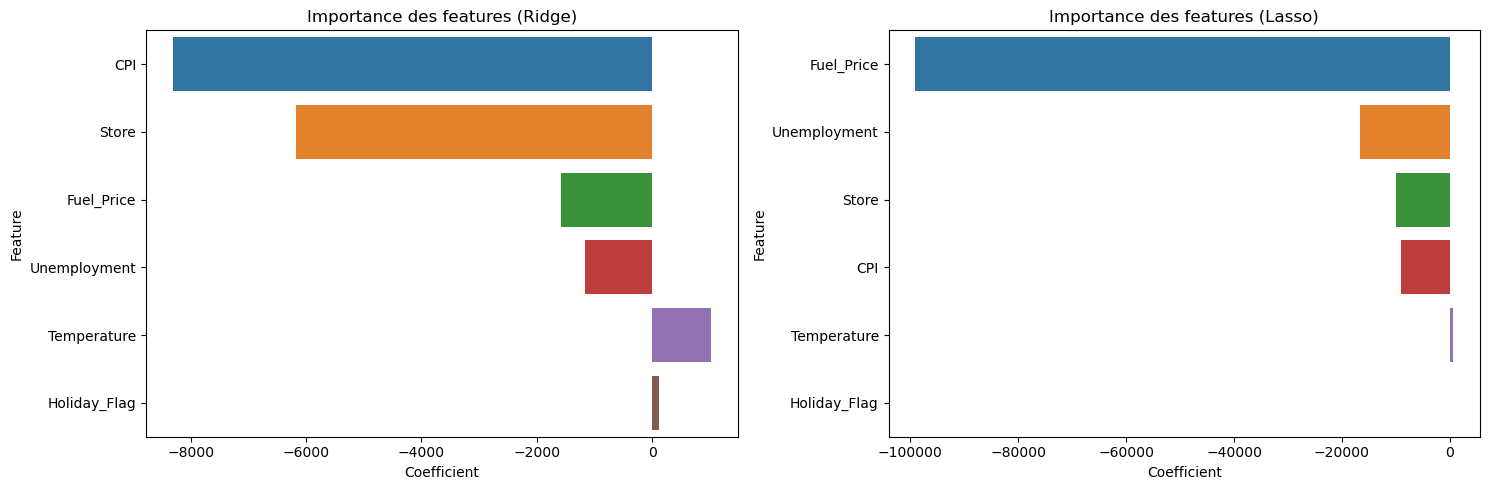

In [39]:
# Visualisation des coefficients
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Coefficient', y='Feature', data=ridge_coef_df)
plt.title('Importance des features (Ridge)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')

plt.subplot(1, 2, 2)
sns.barplot(x='Coefficient', y='Feature', data=lasso_coef_df)
plt.title('Importance des features (Lasso)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

In [42]:
## 5. Analyse des courbes d'apprentissage
def plot_learning_curves(model, X_train, y_train, X_test, y_test, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error'
    )
    
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_rmse, label='Training '+title)
    plt.plot(train_sizes, test_rmse, label='Validation '+title)
    plt.xlabel('Training Examples')
    plt.ylabel(title)
    plt.title(f'Learning Curves - {title}')
    plt.legend()
    plt.grid(True)
    plt.show()


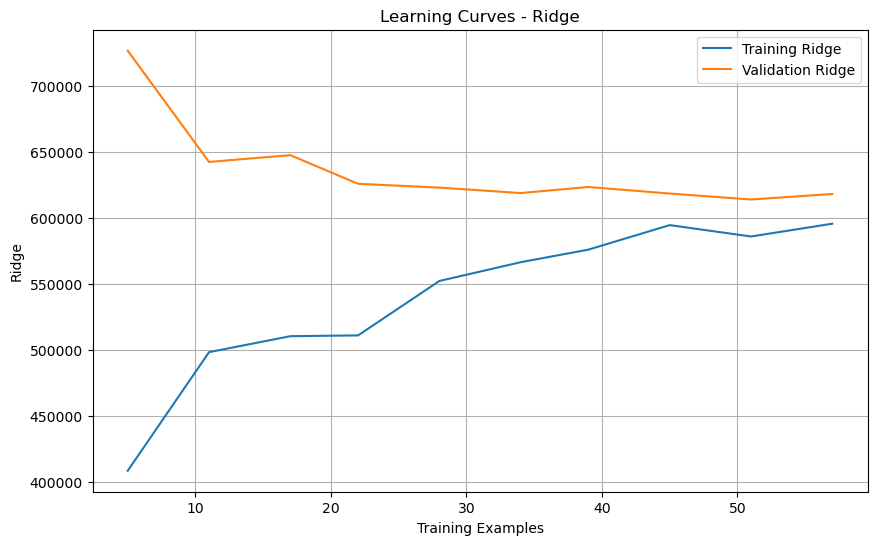

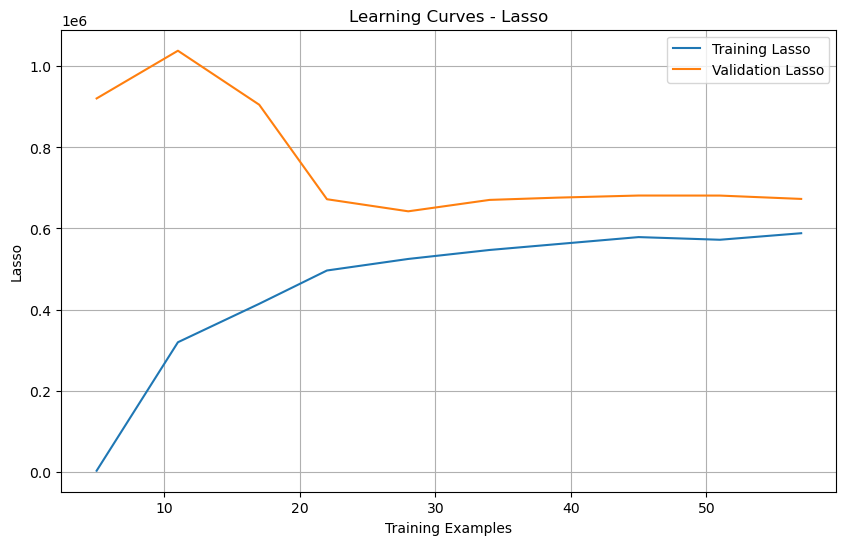

In [41]:
# Tracé des courbes d'apprentissage pour chaque modèle
plot_learning_curves(ridge_cv.best_estimator_, X_train, y_train, X_test, y_test, 'Ridge')
plot_learning_curves(lasso_cv.best_estimator_, X_train, y_train, X_test, y_test, 'Lasso')